In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

# \pi' comparison between class and hi-class

In [2]:
hiclass_cs0=np.loadtxt("./../../output/Kessence_field.dat")
# hiclass_cs1=np.loadtxt("./Kessence_field_cs1.dat")
# hiclass_cs0z0=np.loadtxt("./Kessence_field_cs0_z0.dat")
# class_cs0_synch=np.loadtxt("./class_kess_cs0_synch_tk.dat")
# class_cs1_synch=np.loadtxt("./class_kess_cs1_synch_tk.dat")
# class_cs0_newt=np.loadtxt("./class_kess_cs0_newt_tk.dat")
# class_cs1_newt=np.loadtxt("./class_kess_cs1_newt_tk.dat")

In [10]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0
astar_hi=1./101. # z=100, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
dataprime_hi = data_hi[mask_hi]
dataprime_hi

array([[  4.50016400e+00,   9.49752800e-03,   5.22753300e-02, ...,
          5.87136900e-02,   3.66545500e-05,   8.14426200e-03],
       [  4.50016400e+00,   9.49752800e-03,   5.22754200e-02, ...,
          5.87137300e-02,   3.66544900e-05,   8.14426700e-03],
       [  4.50016400e+00,   9.31513900e-03,   5.16787400e-02, ...,
          5.81745800e-02,   3.66418500e-05,   8.30931400e-03],
       ..., 
       [  7.12503200e-06,   9.78654000e-03,   3.06478400e-09, ...,
          3.00138800e+02,   2.09169500e-01,   3.98146400e+01],
       [  7.12503200e-06,   1.05317100e-02,   3.43338800e-09, ...,
          3.12238600e+02,   2.08716300e-01,   3.70781900e+01],
       [  7.12503200e-06,   1.02818100e-02,   3.30823000e-09, ...,
          3.08231400e+02,   2.08863200e-01,   3.79525900e+01]])

# Make the file of hi-class

In [24]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0
astar_hi=1./101. # z=100, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs0=np.zeros((np.shape(klist_hi)[0],3)); # the Gev appropriate file
                                             # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    
    hiclass_cs0_fin[i,0]=klist_hi[i]
    hiclass_cs0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0_fin[i,5]=interp_psi(astar_hi)
    
    Gev_cs0[i,0]=hiclass_cs0_fin[i,0];
    Gev_cs0[i,1]=hiclass_cs0_fin[i,1]+hiclass_cs0_fin[i,3];
    Gev_cs0[i,2]=hiclass_cs0_fin[i,2]+hiclass_cs0_fin[i,4];

Result=Gev_cs0[::-1,:]
np.savetxt('kessence_gev_cs0z100.dat', Result, fmt='%.12e', delimiter='\t', newline='\n')
# hiclass_cs0_fin[:30,0]

In [ ]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0
astar_hi=1./101. # z=100, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs0=np.zeros((np.shape(klist_hi)[0],3)); # the Gev appropriate file
                                             # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    
    hiclass_cs0_fin[i,0]=klist_hi[i]
    hiclass_cs0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0_fin[i,5]=interp_psi(astar_hi)
    
    Gev_cs0[i,0]=hiclass_cs0_fin[i,0];
    Gev_cs0[i,1]=hiclass_cs0_fin[i,1]+hiclass_cs0_fin[i,3];
    Gev_cs0[i,2]=hiclass_cs0_fin[i,2]+hiclass_cs0_fin[i,4];

Result=Gev_cs0[::-1,:]
np.savetxt('kessence_gev_cs0z100.dat', Result, fmt='%.12e', delimiter='\t', newline='\n')
# hiclass_cs0_fin[:30,0]

In [4]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs1
astar_hi=1./101. # z=0, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs1_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs1=np.zeros((np.shape(klist_hi)[0],3)); # the Gev appropriate file
                                             # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    
    hiclass_cs1_fin[i,0]=klist_hi[i]
    hiclass_cs1_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs1_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs1_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs1_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs1_fin[i,5]=interp_psi(astar_hi)
    
    Gev_cs1[i,0]=hiclass_cs1_fin[i,0];
#     Gev_cs1[i,1]=hiclass_cs1_fin[i,1]-hiclass_cs1_fin[i,3];
    Gev_cs1[i,1]=hiclass_cs1_fin[i,1];
    Gev_cs1[i,2]=hiclass_cs1_fin[i,2]-hiclass_cs1_fin[i,4];

Result=Gev_cs1[::-1,:]
np.savetxt('kessence_gev_cs1z100.dat', Result, fmt='%.12e', delimiter='\t', newline='\n')
# hiclass_cs1_fin[:30,0]

In [5]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0z0
astar_hi=1./1. # z=0, desired redshift
ainterval_hi=0.003
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0z0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs0z0=np.zeros((np.shape(klist_hi)[0],3)); # the Gev appropriate file
                                             # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    
    hiclass_cs0z0_fin[i,0]=klist_hi[i]
    hiclass_cs0z0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0z0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0z0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0z0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0z0_fin[i,5]=interp_psi(astar_hi)
    
    Gev_cs0z0[i,0]=hiclass_cs0z0_fin[i,0];
#     Gev_cs1[i,1]=hiclass_cs1_fin[i,1]-hiclass_cs1_fin[i,3];
    Gev_cs0z0[i,1]=hiclass_cs0z0_fin[i,1];
    Gev_cs0z0[i,2]=hiclass_cs0z0_fin[i,2]-hiclass_cs0z0_fin[i,4];

Resultz0=Gev_cs0z0[::-1,:]
np.savetxt('kessence_gev_cs1z0.dat', Resultz0, fmt='%.12e', delimiter='\t', newline='\n')
# hiclass_cs1_fin[:30,0]

# Psi comparison in class and hi-class

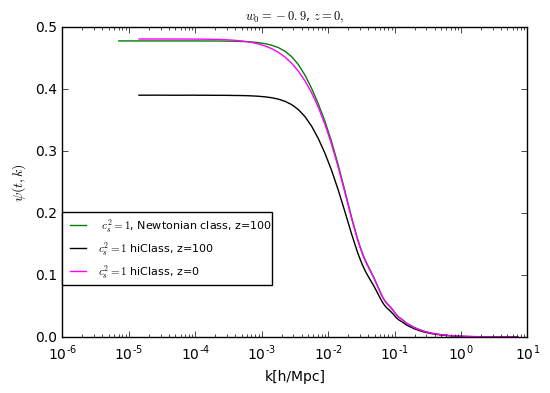

In [37]:
# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.
h=0.67
# plt.plot(class_cs0_synch[:111,0]*h,class_cs0_synch[:111,7],color="red",label=r" $c_s^2=10^{-6}$, Synch class")
plt.plot(class_cs0_newt[:111,0]*h,class_cs1_newt[:111,8]*0.8,color="green",label=r" $c_s^2=1$, Newtonian class, z=100")
# plt.plot(hiclass_cs0_fin[:,0],hiclass_cs0_fin[:,5],color="blue",label=r"$c_s^2=10^{-6}$ hiClass")
plt.plot(hiclass_cs1_fin[:,0],hiclass_cs1_fin[:,5]/(101),color="black",label=r"$c_s^2=1$ hiClass, z=100")
plt.plot(hiclass_cs0z0_fin[:,0],hiclass_cs0z0_fin[:,5],color="Magenta",label=r"$c_s^2=1$ hiClass, z=0")

# H=2.25*10**-4;
# plt.plot(class_cs0_newt[:111,0],-(-class_cs0_synch[:111,4]+class_cs0_newt[:111,4])/(0.3*H),color="red",label=r"class, $\alpha$ from $\frac{T_{newt}-T_{synch}}{3\mathcal{H}(1+w)}$ , z=100")
# plt.plot(hiclass_cs1_fin[:,0]/h,hiclass_cs1_fin[:,3],color="blue",label=r"hi-class, $\alpha$ directly from hi-class $c_s^2$=1, $w_0$=-0.9, z=0")
# plt.legend(bbox_to_anchor=(0., 1.11, 1., .102), fontsize=8,loc=1,ncol=1, mode="expand", borderaxespad=0.)



plt.legend(bbox_to_anchor=(0.0, 0.3, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$z=0,$",fontsize=9)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\psi(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('pi_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

#  \pi _synch comparison in Class and hi-class
# Problem: Why there is a difference?!

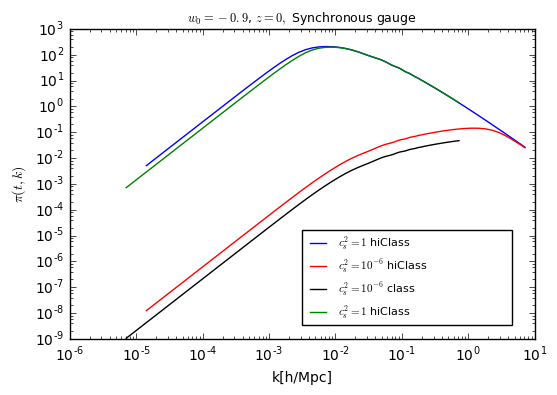

In [38]:
cs2=1.e-6;
w0=-0.9
H=2.25*10**-4;
h=0.67

pi_sync_class_cs0=-class_cs0_synch[:,11]/((class_cs0_synch[:,0]*h)**2);
pi_sync_class_cs1=-class_cs1_synch[:,11]/((class_cs1_synch[:,0]*h)**2);

# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.
# There is a disagreement, If we multiply to h^2 we get 

# plt.plot(class_cs1_synch[:111,0]*h,-pi_class_synch_cs1[:111],color="Red",label=r"$\pi$-synch class")
# plt.plot(class_cs0_synch[:111,0]*h,-pi_sync_class_cs0[:111],color="red",label=r" $c_s^2=10^{-6}$ class")
# plt.plot(hiclass_cs0_fin[:,0],hiclass_cs0_fin[:,1],color="blue",label=r"$c_s^2=10^{-6}$ hiClass")
# plt.plot(class_cs1_synch[:111,0]*h,-pi_sync_class_cs1[:111],color="green",label=r" $c_s^2=1$ class")
plt.plot(hiclass_cs1_fin[:,0],hiclass_cs1_fin[:,1],color="Blue",label=r"$c_s^2=1$ hiClass")
plt.plot(hiclass_cs1_fin[:,0],hiclass_cs0_fin[:,1],color="Red",label=r"$c_s^2=10^{-6}$ hiClass")
plt.plot(class_cs0_synch[:,0]*h,pi_sync_class_cs0[:],color="black",label=r"$c_s^2=10^{-6}$ class")
plt.plot(class_cs0_synch[:,0]*h,pi_sync_class_cs1[:],color="green",label=r"$c_s^2=1$ hiClass")

plt.legend(bbox_to_anchor=(0.5, 0.25, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$z=0,$"+" Synchronous gauge",fontsize=9)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('pi_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

#  \pi Newt comparison in Class and hi-class
# Problem: Why there is a difference?!

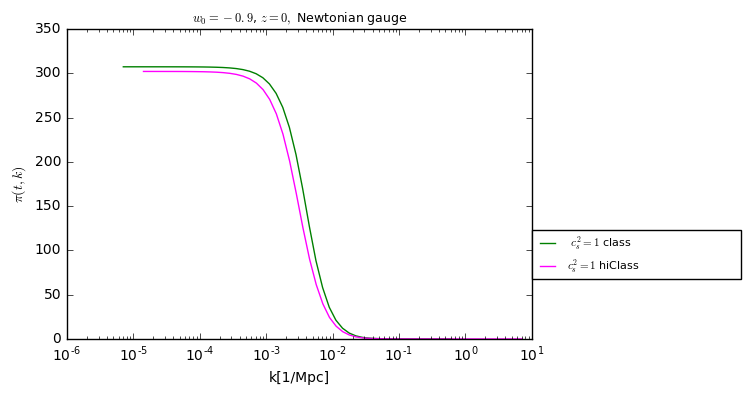

In [43]:
cs2=1.e-6;
w0=-0.9
H=2.25*10**-4;
h=0.67

pi_newt_class_cs0=-class_cs0_newt[:,12]/((class_cs0_newt[:,0]*h)**2);
pi_newt_class_cs1=-class_cs1_newt[:,12]/((class_cs1_newt[:,0]*h)**2);
pi_newt_hiclass_cs0=(hiclass_cs0_fin[:,1]+hiclass_cs0_fin[:,3]);
pi_newt_hiclass_cs1=-(hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,3]);

# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.
# There is a disagreement, If we multiply to h^2 we get 

# plt.plot(class_cs0_newt[:111,0]*h,-pi_newt_class_cs0[:111],color="red",label=r" $c_s^2=10^{-6}$ class")
# plt.plot(hiclass_cs0_fin[:,0],pi_newt_hiclass_cs0[:],color="blue",label=r"$c_s^2=10^{-6}$ hiClass")
plt.plot(class_cs1_newt[:111,0]*h,-pi_newt_class_cs1[:111],color="green",label=r" $c_s^2=1$ class")
plt.plot(hiclass_cs1_fin[:,0],pi_newt_hiclass_cs1[:],color="magenta",label=r"$c_s^2=1$ hiClass")


plt.legend(bbox_to_anchor=(1., 0.25, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$z=0,$"+" Newtonian gauge",fontsize=9)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("k[1/Mpc]")
plt.ylabel(r"$\pi(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('pi_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

In [ ]:
#Presentation

###  \pi' Newtonian comparison in Class and hi-class

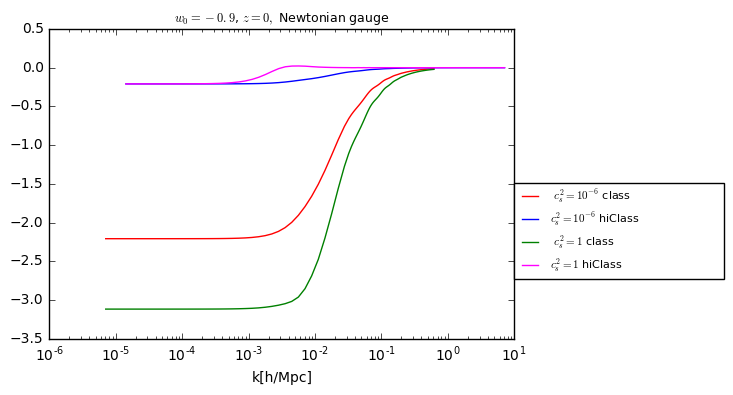

In [12]:
cs02=1.e-6;
cs12=1.0;
w0=-0.9
H=2.25*10**-4;
h=0.67
pi_class_cs0_newt=class_cs0_newt[:111,11]/((class_cs0_newt[:111,0]*h)**2);
pi_class_cs1_newt=class_cs1_newt[:111,11]/((class_cs1_newt[:111,0]*h)**2);

pi_prime_class_newt_cs0=class_cs0_newt[:111,8]-H*(1-3.*w0)*pi_class_cs0_newt + cs02*class_cs0_newt[:111,4]/(1+w0) + 3.*H*(cs02-w0)*pi_class_cs0_newt/(1.+w0);
pi_prime_class_newt_cs1=class_cs1_newt[:111,8]-H*(1-3.*w0)*pi_class_cs1_newt + cs12*class_cs1_newt[:111,4]/(1+w0) + 3.*H*(cs12-w0)*pi_class_cs1_newt/(1.+w0);

pi_prime_hi_newt_cs0=hiclass_cs0_fin[:,2]-hiclass_cs0_fin[:,4];
pi_prime_hi_newt_cs1=hiclass_cs1_fin[:,2]-hiclass_cs1_fin[:,4];

# pi_prime_class_newt_cs1=
# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.

# pi_newt_hiclass_cs1=hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,3];
# pi_newt_hiclass_cs0=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,3];

# pi_synch_hiclass_cs1=hiclass_cs1_fin[:,1];
# plt.plot(hiclass_cs0_fin[:,0], hiclass_cs0_fin[:,4],color="blue",label=r"$c_s^2=10^{-6}$ hiClass")
# plt.plot(hiclass_cs0_fin[:,0], hiclass_cs1_fin[:,4],color="green",label=r"$c_s^2=10^{-6}$ hiClass")


plt.plot(class_cs0_newt[:111,0]*h,-pi_prime_class_newt_cs0[:],color="red",label=r" $c_s^2=10^{-6}$ class")
plt.plot(hiclass_cs0_fin[:,0], pi_prime_hi_newt_cs0[:],color="blue",label=r"$c_s^2=10^{-6}$ hiClass")

plt.plot(class_cs1_newt[:111,0]*h,-pi_prime_class_newt_cs1[:],color="green",label=r" $c_s^2=1$ class")
plt.plot(hiclass_cs1_fin[:,0], pi_prime_hi_newt_cs1[:],color="magenta",label=r"$c_s^2=1$ hiClass")


# plt.plot(class_cs0_newt[:111,0]*h,np.abs(pi_prime_class_cs0[:111]),color="green",label=r"$c_s^2=1$ hiClass")
# plt.plot(hiclass_cs0_fin[:,0],np.abs(pi_prime_newt_hiclass_cs0[:])*4.2,color="black",label=r"$c_s^2=1$ hiClass")

# plt.plot(class_cs0_newt[:111,0]*h,-pi_prime_newt_class_cs0[:111],color="black",label=r" $c_s^2=10^{-6}$ class")
# plt.plot(hiclass_cs0_fin[:,0],pi_prime_newt_hiclass_cs0[:],color="green",label=r"$c_s^2=10^{-6}$ hiClass")

plt.legend(bbox_to_anchor=(1.0, 0.40, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$z=0,$"+" Newtonian gauge",fontsize=9)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("k[h/Mpc]")
# plt.ylabel(r"$\pi'(t,k)$")
# plt.ylim(-0.5,2.5)
# plt.savefig('pi_prime_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

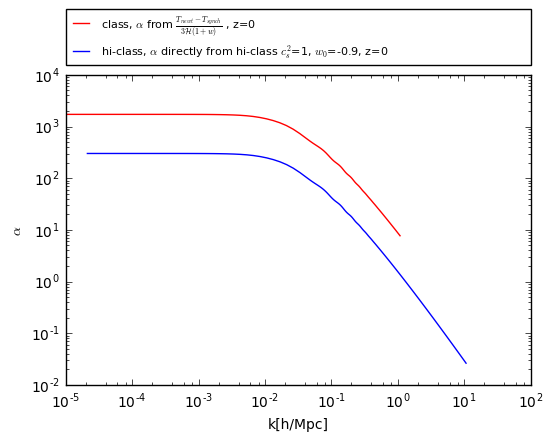

In [23]:
H=2.25*10**-4;
plt.plot(class_cs1_synch[:,0],-(-class_cs1_synch[:,4]+class_cs1_newt[:,4])/(0.3*H),color="red",label=r"class, $\alpha$ from $\frac{T_{newt}-T_{synch}}{3\mathcal{H}(1+w)}$ , z=0")
plt.plot(hiclass_cs1_fin[:,0]/h,hiclass_cs1_fin[:,3],color="blue",label=r"hi-class, $\alpha$ directly from hi-class $c_s^2$=1, $w_0$=-0.9, z=0")
plt.legend(bbox_to_anchor=(0., 1.11, 1., .102), fontsize=8,loc=1,ncol=1, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\alpha$")
# plt.ylim(-1.,0.22)
# plt.savefig('Kessence-smgfld_comp.jpg',bbox_inches='tight')
plt.show()

# \pi comparison in hi-class and class

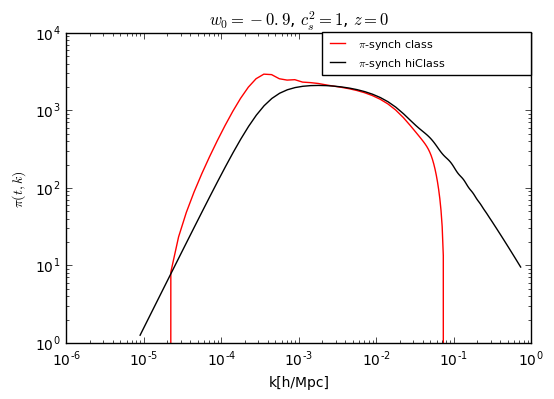

In [114]:
cs2=1.
w0=-0.9
wovecs2=(1+w0)/cs2;
H=2.25*10**-4;
h=0.67

pi_newt_class_cs1=class_cs1_newt[:,12]/((class_cs1_newt[:,0]*h)**2);
pi_class_synch_cs1=class_cs1_synch[:111,12]/((class_cs1_synch[:111,0]*h)**2)+hiclass_cs1_fin[:111,3];

# k in class is h/Mpc so by multiplying to h we get in 1/Mpc
# \alpha also is divided by k^2 so notice the dimension.
pi_newt_hiclass_cs1=hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,3];

pi_synch_hiclass_cs1=hiclass_cs1_fin[:,1];


plt.plot(class_cs1_synch[:111,0]*h,-pi_class_synch_cs1[:111],color="Red",label=r"$\pi$-synch class")
# plt.plot(class_cs1_newt[:111,0]/h,pi_synch_class_cs1[:111],color="Green",label=r"$\pi$-synch class")
plt.plot(hiclass_cs1_fin[:,0],pi_synch_hiclass_cs1[:],color="black",label=r"$\pi$-synch hiClass")
# plt.plot(hiclass_cs1_fin[:,0],hiclass_cs1_fin[:,1],color="blue",label=r"$\pi$-synch hiClass")

plt.legend(bbox_to_anchor=(0.55, 0.9, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=1$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi(t,k)$")
# plt.ylim(-30,0.11)
plt.savefig('pi_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

In [101]:
plt.plot(hiclass_cs1_fin[:,0],hiclass_cs1_fin[:,5],color="Blue",label="hi-class_psi")
plt.plot(psi_class[:,0],psi_class[:,2],color="Red",label="Class_Newt_psi")
# plt.plot(rho_T[:,0],(rho_T[:,6]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(class_new[:,0],class_new[:,4],color="Red",label="Class_Sync, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(rho_T[:,0],rho_T[:,6]/(-file_classNew[:111,4]+file_classSyn[:111,4]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_hiclassz0[:,0],(file_hiclassz0Plus[:111,2]-file_hiclassz0[:111,2])/2.,color="Blue",label="MyResult_z=0_Newtonian+, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_classNew[:111,0],-file_classNew[:111,4]+file_classSyn[:111,4],color="red",label="Class_Newt, T_fld,w_0=-0.9,cs=1, z=0")

plt.legend(bbox_to_anchor=(0.65, 0.9, 0.35, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\psi(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

NameError: name 'psi_class' is not defined

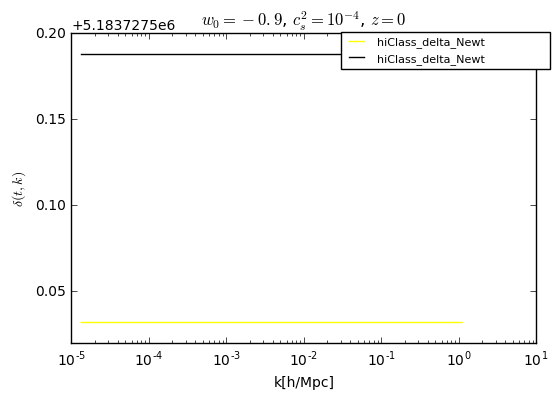

In [65]:
cs2=1.
w0=-0.9
wovecs2=(1+w0)/cs2;
H=2.25*10**-4;
h=0.67
# As=2.215*10.e-9
# ns=0.96
# kp=0.05
# deltaR2=2*np.pi**2*As*(hiclass_cs0_fin[:,0]/kp)**(ns-1)/((hiclass_cs0_fin[:,0])**(3))
deltaclass_cs1=class_cs1_newt[:,4];
# psi_cs0=hiclass_cs0_fin[:,5];
psi_cs1=hiclass_cs1_fin[:,5];
hi_newt_pi_prime=hiclass_cs1_fin[:,2]+hiclass_cs1_fin[:,4]
delta_Newt_hiclass_c1=0.1*(-H*hiclass_cs1_fin[:,3]+hiclass_cs1_fin[:,2]);
delta_synch_hiclass_c1=delta_Newt_hiclass_c1-3*(1+w0)*H*hiclass_cs1_fin[:,3]

delta_Newt_hiclass_c0=10**7*(-H*hiclass_cs0_fin[:,3]+hiclass_cs0_fin[:,2]);
delta_synch_hiclass_c0=delta_Newt_hiclass_c0-3*(1+w0)*H*hiclass_cs0_fin[:,3]
# pi_primeclass_newt=10*(deltaclass_cs1[:111])+psi_cs1[:111]
# pi_primeclass_synch=pi_primeclass_newt[:111]-10*hiclass_cs1_fin[:,4];
# pi_newt_class=
# pi_synch_class=
# pi_class_cs0=10.**-3*(deltaclass_cs0[:111])+psi_cs0[:111]
# pi_class_cs1=10.*(deltaclass_cs1[:111])+psi_cs1[:111]
# alpha=hiclass_cs1_fin[:,1]-hiclass_cs1_fin[:,2];

# alpha=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,2];
# alpha_prime=hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,4];
# pi_prime_newt_2transform=hiclass_cs0_fin[:,3]-alpha_prime[:]-alpha
# delta2=wovecs2*(pi_prime_newt_2transform[:]-hiclass_cs0_fin[:,5])
# delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5])
# delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5])
# plt.plot(class_cs1_newt_org[:111,0],pi_primeclass_cs1[:]*np.sqrt(deltaR2[:111]),color="black",label="Class_Newt_cs2=10**-2,w=-0.9")
# plt.plot(class_cs0_newt[:111,0]/h,pi_primeclass_cs0[:],color="Blue",label="Class_Newt_cs2=1,w=-0.9")
# plt.plot(hiclass_cs1_fin[:,0]/h,-delta_Newt_hiclass[:],color="Magenta",label="hiClass_delta_Newt")
# plt.plot(class_cs1_synch[:,0],-class_cs1_synch[:,4],color="red",label="class_Synch")
# plt.plot(class_cs0_newt[:,0],-class_cs0_newt[:,4],color="blue",label="class_Newt")
plt.plot(hiclass_cs0_fin[:,0]/h,-delta_Newt_hiclass_c0[:],color="Yellow",label="hiClass_delta_Newt")
plt.plot(hiclass_cs0_fin[:,0]/h,-delta_synch_hiclass_c0[:],color="black",label="hiClass_delta_Newt")

plt.legend(bbox_to_anchor=(0.58, 0.9, 0.45, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\delta(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

# \theta comparison in hi-class and class

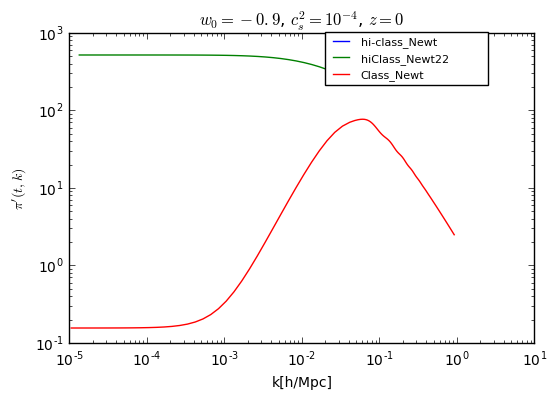

In [24]:
cs2=10.**-4
w0=-0.9
wovecs2=(1+w0)/cs2;
H=2.25*10**-4;
alpha=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,2];
alpha_prime=hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,4];
pi_prime_newt_2transform=hiclass_cs0_fin[:,3]-alpha_prime[:]-alpha
delta2=wovecs2*(pi_prime_newt_2transform[:]-hiclass_cs0_fin[:,5])
# delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5])
delta_hi_newt=wovecs2*(hiclass_cs0_fin[:,3]-hiclass_cs0_fin[:,5]);
plt.plot(hiclass_cs0_fin[:,0]/h,-delta_hi_newt[:],color="Blue",label="hi-class_Newt")
plt.plot(hiclass_cs0_fin[:,0]/h,-delta2[:],color="Green",label="hiClass_Newt22")

plt.plot(class_cs0_newt[:111,0],-class_cs0_newt[:111,4],color="Red",label="Class_Newt")

# plt.plot(rho_T[:,0],(rho_T[:,6]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(class_new[:,0],class_new[:,4],color="Red",label="Class_Sync, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(rho_T[:,0],rho_T[:,6]/(-file_classNew[:111,4]+file_classSyn[:111,4]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_hiclassz0[:,0],(file_hiclassz0Plus[:111,2]-file_hiclassz0[:111,2])/2.,color="Blue",label="MyResult_z=0_Newtonian+, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_classNew[:111,0],-file_classNew[:111,4]+file_classSyn[:111,4],color="red",label="Class_Newt, T_fld,w_0=-0.9,cs=1, z=0")

plt.legend(bbox_to_anchor=(0.55, 0.9, 0.35, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi'(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

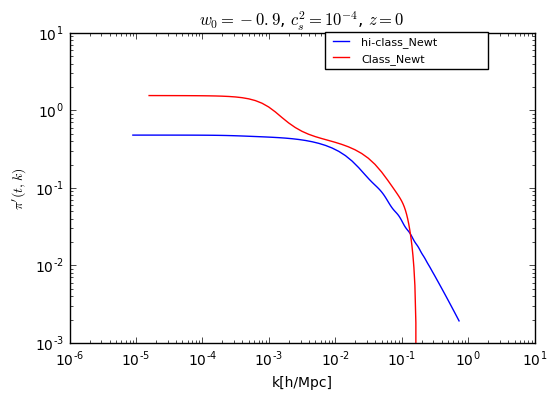

In [29]:
cs2=10.**-8
w0=-0.9
csoverw=cs2/(1+w0);
alpha=hiclass_cs0_fin[:,1]-hiclass_cs0_fin[:,2];
h=0.67
plt.plot(hiclass_cs1_fin[:,0],(hiclass_cs1_fin[:,5]),color="Blue",label="hi-class_Newt")
plt.plot(class_cs1_newt[:111,0]/h,-(10*class_cs1_newt[:111,4]+hiclass_cs1_fin[:111,5]),color="Red",label="Class_Newt")
# plt.plot(rho_T[:,0],(rho_T[:,6]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(class_new[:,0],class_new[:,4],color="Red",label="Class_Sync, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(rho_T[:,0],rho_T[:,6]/(-file_classNew[:111,4]+file_classSyn[:111,4]),color="green",label="hi-class- alpha, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_hiclassz0[:,0],(file_hiclassz0Plus[:111,2]-file_hiclassz0[:111,2])/2.,color="Blue",label="MyResult_z=0_Newtonian+, T_fld,w_0=-0.9,cs=1, z=0")
# plt.plot(file_classNew[:111,0],-file_classNew[:111,4]+file_classSyn[:111,4],color="red",label="Class_Newt, T_fld,w_0=-0.9,cs=1, z=0")

plt.legend(bbox_to_anchor=(0.55, 0.9, 0.35, .102), loc=1,ncol=1, fontsize=8, mode="expand", borderaxespad=0.)
plt.title( r"$w_0=-0.9$"+", "+r"$c_s^2=10^{-4}$"+", $z=0$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$\pi'(t,k)$")
# plt.ylim(-30,0.11)
# plt.savefig('sync_comp.jpg',bbox_inches='tight')
plt.show()
# (0.3*2.25*10**(-4))

1.0000000000000002e-07